In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [283]:
ls

'Analyze connectivity reach.ipynb'       import_sonatafiles.ipynb
'Analyze connectivity strengths.ipynb'   node_sets.json
 Circuitexamples.ipynb                   O1_data_physiology/
'Circuit exploration examples.ipynb'     save_new_positions_3Dplots.ipynb
 import_3Dplots_rearange.ipynb          'Synaptic innervation patterns.ipynb'
 import_h5infos.ipynb*                   topology_analysis.log


In [284]:
CircuitPath = '/home/fernando/Documents/SCx_model/O1_data_physiology/'

Atlas = CircuitPath + 'atlas/'

Atlas2 = 'O1_data_physiology/voxel_atlas_data/'

MorphologyPath = CircuitPath + 'morphologies/ascii/'

nrnPath = CircuitPath + 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical/edges.h5'

CellLibraryFile = CircuitPath + 'S1nonbarrel_neurons/nodes.h5'

METypePath = CircuitPath + 'emodels_hoc/'


# Path = CircuitPath + 'sonata/edges/edges_hippocampus_projections.h5'

lst_properties = [ 'etype', 'exc_mini_frequency', 'inh_mini_frequency', 'layer', 'me_combo', 'model_template', 'model_type', 'morph_class', 'morphology', 'mtype', 
                  'orientation_w', 'orientation_x', 'orientation_y', 'orientation_z', 'population', 'region', 'synapse_class', '@dynamics:holding_current', 
                  '@dynamics:input_resistance', '@dynamics:resting_potential', '@dynamics:threshold_current', 'x', 'y', 'z']

In [285]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import json

from bluepysnap import Circuit
from bluepysnap.bbp import Cell

circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)

In [286]:
print(circuit.nodes.population_names)
print()
print(circuit.edges.population_names)


['POm', 'S1nonbarrel_neurons', 'VPM', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical']

['POm__S1nonbarrel_neurons__chemical', 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'VPM__S1nonbarrel_neurons__chemical', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical', 'midrange__S1nonbarrel_neurons__chemical']


In [287]:
f = open('node_sets.json') 
node_sets = json.load(f) 
   
print(node_sets.keys())
print(len(node_sets['hex2']['node_id']))

dict_keys(['Layer2Excitatory', 'Layer3Excitatory', 'Layer23Excitatory', 'Layer4Excitatory', 'Layer5Excitatory', 'Layer6Excitatory', 'Layer2346Excitatory', 'Layer1Inhibitory', 'Layer23Inhibitory', 'Layer4Inhibitory', 'Layer5Inhibitory', 'Layer6Inhibitory', 'hex0', 'hex1', 'hex2', 'hex3', 'hex4', 'hex5', 'hex6', 'hex_O1', 'proj_Thalamocortical_VPM_Source', 'proj_Thalamocortical_POM_Source', 'Mosaic', 'All', 'Excitatory', 'Inhibitory', 'L1_DAC', 'L1_HAC', 'L1_LAC', 'L1_NGC-DA', 'L1_NGC-SA', 'L1_SAC', 'L23_BP', 'L23_BTC', 'L23_CHC', 'L23_DBC', 'L23_LBC', 'L23_MC', 'L23_NBC', 'L23_NGC', 'L23_SBC', 'L2_IPC', 'L2_TPC:A', 'L2_TPC:B', 'L3_TPC:A', 'L3_TPC:C', 'L4_BP', 'L4_BTC', 'L4_CHC', 'L4_DBC', 'L4_LBC', 'L4_MC', 'L4_NBC', 'L4_NGC', 'L4_SBC', 'L4_SSC', 'L4_TPC', 'L4_UPC', 'L5_BP', 'L5_BTC', 'L5_CHC', 'L5_DBC', 'L5_LBC', 'L5_MC', 'L5_NBC', 'L5_NGC', 'L5_SBC', 'L5_TPC:A', 'L5_TPC:B', 'L5_TPC:C', 'L5_UPC', 'L6_BP', 'L6_BPC', 'L6_BTC', 'L6_CHC', 'L6_DBC', 'L6_HPC', 'L6_IPC', 'L6_LBC', 'L6_MC', 'L

In [288]:
cells = circuit.nodes["S1nonbarrel_neurons"]

conn = circuit.edges["S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"]

In [7]:
# connsinfo = conn.get()

## Cells info

In [8]:
nodesinfo = cells.get()
nodesinfo

,etype,exc_mini_frequency,hexagon,inh_mini_frequency,layer,me_combo,model_template,model_type,morph_class,morphology,...,x,x_new,y,y_new,z,z_new,@dynamics:holding_current,@dynamics:input_resistance,@dynamics:resting_potential,@dynamics:threshold_current
node_ids,,,,,,,,,,,,,,,,,,,,,
0,bNAC,0.010108,4,0.233243,1,bNAC_L23SBC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23SBC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...,...,4652.171846,1186.342262,-1930.525524,1056.598715,-1836.395782,2116.512223,-0.063857,163.571762,-74.320229,0.114051
1,cNAC,0.010108,5,0.233243,1,cNAC_L23NGC_L1_DAC_1_C270106A_-_Scale_x1.000_y...,hoc:cNAC_L23NGC,biophysical,INT,C270106A_-_Scale_x1.000_y1.025_z1.000,...,4977.735899,827.067939,-1641.041348,1438.591227,-2140.579908,2030.927731,-0.056414,192.304916,-73.626152,0.083738
2,bNAC,0.010108,5,0.233243,1,bNAC_L23NGC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23NGC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...,...,5011.718764,745.843084,-1565.779688,1494.963507,-2212.599874,1983.697265,-0.059054,169.438538,-72.886154,0.084117
3,cNAC,0.010108,3,0.233243,1,cNAC_L6NGC_L1_DAC_1_sm090918b1-3_idB_-_Scale_x...,hoc:cNAC_L6NGC,biophysical,INT,sm090918b1-3_idB_-_Scale_x1.000_y0.950_z1.000,...,4266.789018,1156.887172,-1804.711830,550.470063,-1531.716011,2104.472352,-0.100206,100.864609,-74.003380,0.157909
4,bNAC,0.010108,6,0.233243,1,bNAC_L23NGC_L1_DAC_1_C270106C_-_Scale_x1.000_y...,hoc:bNAC_L23NGC,biophysical,INT,C270106C_-_Scale_x1.000_y0.975_z1.000,...,4779.539653,504.435398,-1259.558916,1126.535877,-1996.720501,1967.399560,-0.040889,247.846909,-72.796501,0.052005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211707,bNAC,0.010108,1,0.233243,5,bNAC_L23NGC_L5_BP_5_C240300C1_-_Scale_x1.000_y...,hoc:bNAC_L23NGC,biophysical,INT,C240300C1_-_Scale_x1.000_y0.975_z1.000_-_Clone_1,...,4053.191307,100.735078,-663.722760,550.316578,-2140.027223,1328.543682,-0.043246,259.866028,-71.974144,0.048974
211708,dSTUT,0.010108,0,0.233243,5,dSTUT_L5BP_L5_BP_5_C240300C1_-_Clone_0,hoc:dSTUT_L5BP,biophysical,INT,C240300C1_-_Clone_0,...,4002.636889,810.501717,-1382.419711,958.725370,-2641.743271,1011.946737,-0.072633,66.215591,-76.741768,0.182784
211709,bNAC,0.010108,6,0.233243,5,bNAC_L23NGC_L5_BP_5_rp110127_L5-2_idC_-_Scale_...,hoc:bNAC_L23NGC,biophysical,INT,rp110127_L5-2_idC_-_Scale_x1.000_y1.025_z1.000,...,4228.866737,296.626043,-909.053724,1020.879220,-2608.261691,1103.843470,-0.023842,405.003632,-73.244141,0.032160


In [9]:
cells.property_values(Cell.REGION)

{'S1DZ', 'S1FL', 'S1J'}

In [10]:
mtypes = cells.property_values(Cell.MTYPE)

In [11]:
mtypes = list(mtypes)

In [12]:
i = 0
mntypes = {}
for mn in sorted(mtypes):
    mntypes[mn] = i
    i+=1

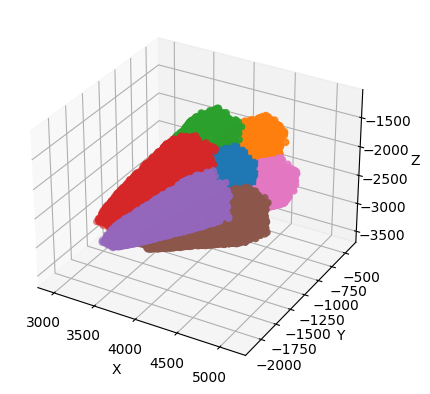

In [13]:
# %matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

for m, morpho in [('s', 'hex0'),  ('o', 'hex1'),  ('o', 'hex2'),('o', 'hex3'),  ('o', 'hex4'),  ('o', 'hex5'),('o', 'hex6')]: #,  ('o', 'hex1'),  ('o', 'hex2'),('o', 'hex3'),  ('o', 'hex4'),  ('o', 'hex5'),('o', 'hex6')
    
    nodeprex = []
    nodeprez = []       
    nodeprey = [] 
    nodepremtype = []    
    for gid in node_sets[morpho]['node_id']: 
        if nodesinfo['region'][gid]!='xS1FL':  
            if 'L' in nodesinfo['mtype'][gid]:     
                nodeprex.append(nodesinfo['x'][gid])
                nodeprey.append(nodesinfo['y'][gid])
                nodeprez.append(nodesinfo['z'][gid])
                nodepremtype.append(mntypes[nodesinfo['mtype'][gid]])
    

    ax.scatter(nodeprex, nodeprey, nodeprez, marker=m)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

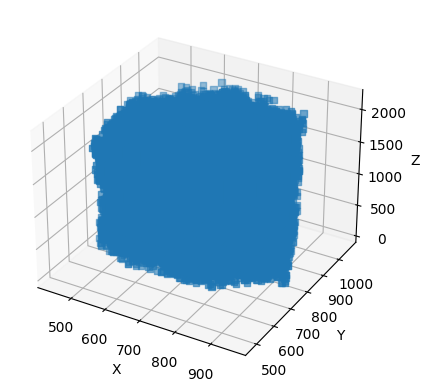

In [14]:
# %matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, morpho in [('s', 'hex0')]: #, ,  ('o', 'hex1'),  ('o', 'hex2'),('o', 'hex3'),  ('o', 'hex4'),  ('o', 'hex5'),('o', 'hex6')]: #,  ('o', 'hex1'),  ('o', 'hex2'),('o', 'hex3'),  ('o', 'hex4'),  ('o', 'hex5'),('o', 'hex6')
    
    nodeprex = []
    nodeprez = []       
    nodeprey = [] 
    nodepremtype = []    
    for gid in node_sets[morpho]['node_id']: 
        if nodesinfo['region'][gid]!='xS1FL':  
            if 'L' in nodesinfo['mtype'][gid]:     
                nodeprex.append(nodesinfo['x_new'][gid])
                nodeprey.append(nodesinfo['y_new'][gid])
                nodeprez.append(nodesinfo['z_new'][gid])
                nodepremtype.append(mntypes[nodesinfo['mtype'][gid]])
    

    ax.scatter(nodeprex, nodeprey, nodeprez, marker=m)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Text(0, 0.5, 'z')

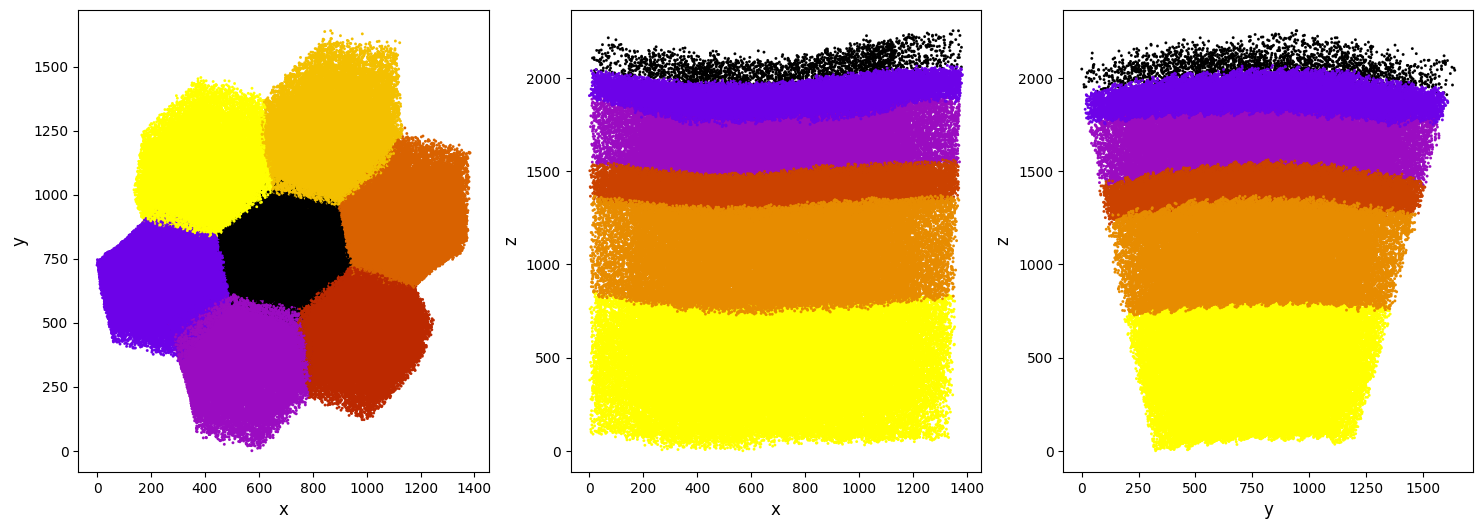

In [15]:
# plot the results
fig=plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.scatter(list(nodesinfo['x_new']),list(nodesinfo['y_new']), lw=0.05, s=4,
            c=list(nodesinfo['hexagon']), cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)


plt.subplot(1,3,2)
plt.scatter(list(nodesinfo['x_new']),list(nodesinfo['z_new']), lw=0.05, s=4,
            c=[int(ii) for ii in list(nodesinfo['layer'])], cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('x', fontsize=12)
plt.ylabel('z', fontsize=12)


plt.subplot(1,3,3)
plt.scatter(list(nodesinfo['y_new']),list(nodesinfo['z_new']), lw=0.05, s=4,
            c=[int(ii) for ii in list(nodesinfo['layer'])], cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('y', fontsize=12)
plt.ylabel('z', fontsize=12)

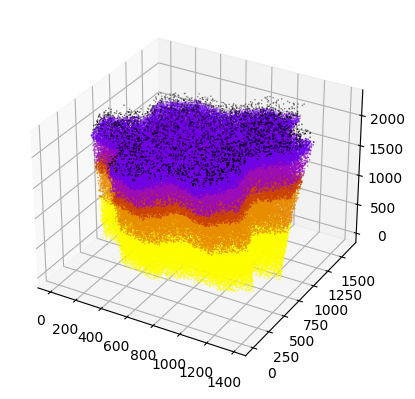

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(list(nodesinfo['x_new']),list(nodesinfo['y_new']),list(nodesinfo['z_new']), lw=0.05, s=1,
            c=[int(ii) for ii in list(nodesinfo['layer'])], cmap=plt.cm.get_cmap('gnuplot', 12))

Text(0, 0.5, 'z')

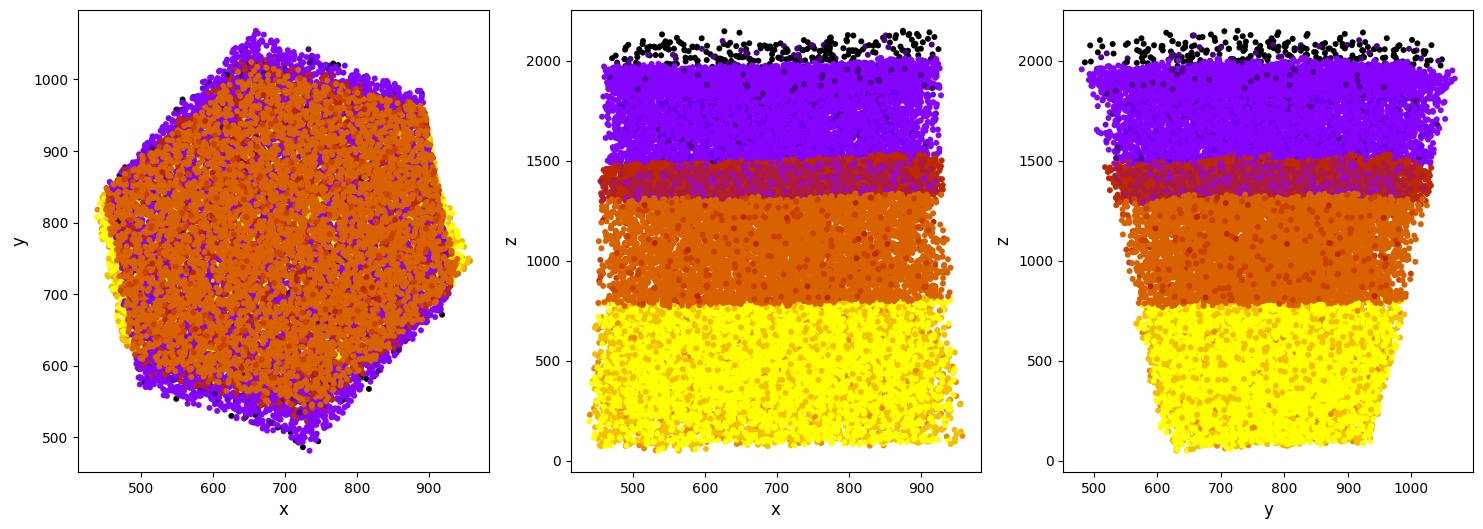

In [17]:
# plot hx0
fig=plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.scatter(nodeprex,nodeprey, lw=0.05, s=18,
            c=nodepremtype, cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)


plt.subplot(1,3,2)
plt.scatter(nodeprex,nodeprez, lw=0.05, s=18,
            c=nodepremtype, cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('x', fontsize=12)
plt.ylabel('z', fontsize=12)


plt.subplot(1,3,3)
plt.scatter(nodeprey,nodeprez, lw=0.05, s=18,
            c=nodepremtype, cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('y', fontsize=12)
plt.ylabel('z', fontsize=12)

In [18]:
print(np.max(nodeprex)-np.min(nodeprex),np.max(nodeprey)-np.min(nodeprey),np.max(nodeprez)-np.min(nodeprez))
print(np.mean(nodeprex),np.mean(nodeprey),np.mean(nodeprez))


518.9358629547596 587.1027151621117 2099.823099376588
694.0439098765031 777.0949063826031 1095.6465504765515


In [19]:
list(nodesinfo)

['etype',
 'exc_mini_frequency',
 'hexagon',
 'inh_mini_frequency',
 'layer',
 'me_combo',
 'model_template',
 'model_type',
 'morph_class',
 'morphology',
 'mtype',
 'orientation_w',
 'orientation_x',
 'orientation_y',
 'orientation_z',
 'population',
 'region',
 'synapse_class',
 'x',
 'x_new',
 'y',
 'y_new',
 'z',
 'z_new',
 '@dynamics:holding_current',
 '@dynamics:input_resistance',
 '@dynamics:resting_potential',
 '@dynamics:threshold_current']

In [20]:
def distance3D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2)+np.power(nodesinfo['z'][gidpre]-nodesinfo['z'][gidpost],2))

def distance2D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2))

def distance2Dmean(gidpre, mean_x, mean_y):
    return np.sqrt(np.power(nodesinfo['x_new'][gidpre]-mean_x,2)+np.power(nodesinfo['y_new'][gidpre]-mean_y,2))

In [21]:
mean_x, mean_y = np.mean(nodeprex), np.mean(nodeprey)

node_gid = [] 
nodeprex_new = []
nodeprez_new = []       
nodeprey_new = [] 
nodepremtype_new = []    

for gid in node_sets['hex0']['node_id']: 
#     if 'L' in nodesinfo['mtype'][gid] and distance2Dmean(gid, mean_x, mean_y)< 12.7:     100 cells
    if 'L5' in nodesinfo['mtype'][gid] and distance2Dmean(gid, mean_x, mean_y)< 9.2:     
        node_gid.append(gid)
        nodeprex_new.append(nodesinfo['x_new'][gid])
        nodeprey_new.append(nodesinfo['y_new'][gid])
        nodeprez_new.append(nodesinfo['z_new'][gid])
        nodepremtype_new.append(mntypes[nodesinfo['mtype'][gid]])
        print(len(node_gid),nodesinfo['me_combo'][gid])
        
node_gid

1 cADpyr_L5TPC_L5_TPC:C_5_dend-Fluo18_upper_axon-vd100825_INT_idA_-_Scale_x1.000_y0.950_z1.000_-_Clone_0
2 cSTUT_L6NGC_L5_LBC_5_og060904a1-3_idC_-_Scale_x1.000_y0.975_z1.000_-_Clone_4
3 cADpyr_L5TPC_L5_UPC_5_dend-vd110511_idI_axon-Fluo15_left_-_Scale_x1.000_y0.950_z1.000
4 cADpyr_L5TPC_L5_UPC_5_dend-rp101213_L5-1_idC_axon-rp101228_L5-2_idC_-_Scale_x1.000_y0.950_z1.000_-_Clone_0
5 cADpyr_L5TPC_L5_TPC:B_5_dend-rp120525_P_1_idC_axon-C060116A5_-_Clone_0
6 cADpyr_L5TPC_L5_TPC:B_5_dend-rp111213_C3_idA_axon-C060116A3_-_Scale_x1.000_y1.050_z1.000_-_Clone_0
7 cADpyr_L5TPC_L5_TPC:B_5_dend-C060202A5_axon-C060116A5_-_Scale_x1.000_y0.975_z1.000
8 cADpyr_L5TPC_L5_TPC:B_5_dend-vd111221_idB_axon-C080501B2_-_Scale_x1.000_y0.950_z1.000_-_Clone_0
9 cADpyr_L5TPC_L5_TPC:A_5_dend-rat_20160316_E2_LH3_cell1_axon-C060109A3_-_Scale_x1.000_y1.050_z1.000
10 cADpyr_L5TPC_L5_TPC:A_5_dend-C060109A3_axon-rat_20160906_E1_LH4_cell1_-_Scale_x1.000_y0.975_z1.000


[172877,
 173539,
 176162,
 177288,
 186706,
 187660,
 189951,
 190969,
 200304,
 203645]

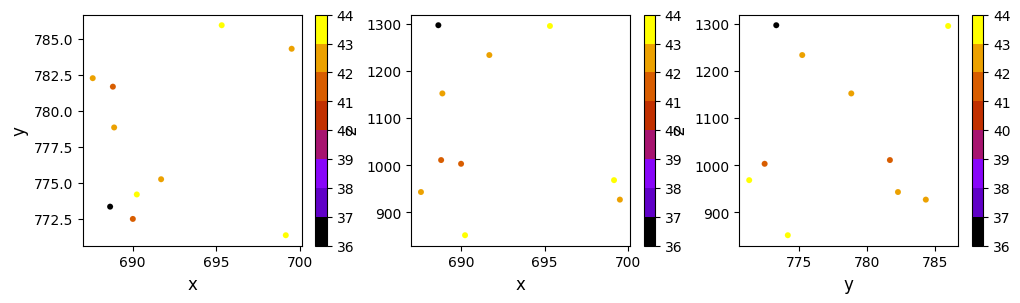

In [22]:
# plot the results
fig=plt.figure(figsize=(12,3))


plt.subplot(1,3,1)
plt.scatter(nodeprex_new,nodeprey_new, lw=0.05, s=18,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 8))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.colorbar();

plt.subplot(1,3,2)
plt.scatter(nodeprex_new,nodeprez_new, lw=0.05, s=18,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 8))
plt.xlabel('x', fontsize=12)
plt.ylabel('z', fontsize=12)
plt.colorbar();


plt.subplot(1,3,3)
plt.scatter(nodeprey_new,nodeprez_new, lw=0.05, s=18,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 8))
plt.xlabel('y', fontsize=12)
plt.ylabel('z', fontsize=12)
plt.colorbar();

In [23]:
most_central_10 = node_gid # - np.ones_like(most_central_10_SP_PC)

most_central_10_SP_PC = most_central_10
Morpholist = []
hoclist = []
for gid in most_central_10_SP_PC:
    MorphoName = MorphologyPath + nodesinfo['morphology'][gid] + '.swc'
    hocName = METypePath + nodesinfo['model_template'][gid][4:] + '.hoc'
    cellName = nodesinfo['model_template'][gid][4:]  
    mcName = nodesinfo['region'][gid][:3]  
    layerName = nodesinfo['region'][gid][4:]  
    print('%s\n %s %.2f %.2f %.2f' % (nodesinfo['model_template'][gid],nodesinfo['region'][gid],nodesinfo['x'][gid],nodesinfo['y'][gid],nodesinfo['z'][gid]))
    
    if cellName not in hoclist:
        hoclist.append(cellName)   
        
    if nodesinfo['morphology'][gid] not in Morpholist:
        Morpholist.append(nodesinfo['morphology'][gid])
        

hoc:cADpyr_L5TPC
 S1FL 4069.81 -1280.39 -2311.99
hoc:cSTUT_L6NGC
 S1FL 4062.78 -1271.79 -2302.90
hoc:cADpyr_L5TPC
 S1FL 3794.56 -1206.98 -2652.88
hoc:cADpyr_L5TPC
 S1FL 3860.68 -1232.53 -2559.47
hoc:cADpyr_L5TPC
 S1FL 4025.37 -1265.66 -2353.71
hoc:cADpyr_L5TPC
 S1FL 3856.58 -1219.64 -2586.01
hoc:cADpyr_L5TPC
 S1FL 3979.70 -1251.46 -2419.83
hoc:cADpyr_L5TPC
 S1FL 3845.56 -1229.14 -2599.93
hoc:cADpyr_L5TPC
 S1FL 3884.64 -1229.06 -2532.96
hoc:cADpyr_L5TPC
 S1FL 3896.70 -1230.82 -2532.45


In [24]:
print('hoclist size =',np.size(hoclist))
print('Morpholist size =',np.size(Morpholist))
# import os # cp only the 646 used morphos # Morpholist2 = cells.property_values(Cell.MORPHOLOGY)

# for MorphoName in Morpholist:
#     mfile = MorphologyPath + MorphoName + '.asc'
#     outfile = '/home/fernando/NetPyNE_SONATA/SCx_model/O1_data_physiology/morphologies/ascii/' + MorphoName + '.asc'
# #     os.popen("cp {0} {1}".format(mfile, outfile))
#     print(outfile)

hoclist size = 2
Morpholist size = 10


In [25]:
import neurom, scipy
from neurom import geom
from neurom import viewer
import os

from neuron import h
from neuron.units import mV, ms
import plotly
import plotly.graph_objects as go


h.load_file("import3d.hoc")
h.load_file("stdrun.hoc")

gid = 172877

MorphoName = MorphologyPath + nodesinfo['morphology'][gid] + '.asc'

cellmorpho = h.Import3d_Neurolucida3()
cellmorpho.input(MorphoName)
# i3d = h.Import3d_GUI(cellmorpho, False)
# i3d.instantiate(None)

# ps = h.PlotShape(False)
# ps.variable("v")
# ps.scale(-70, 40)
# fig = ps.plot(plotly, line={"width": 4})

# fig.show()


15168 lines read


0.0

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'Morphology'}, xlabel='x', ylabel='y'>)

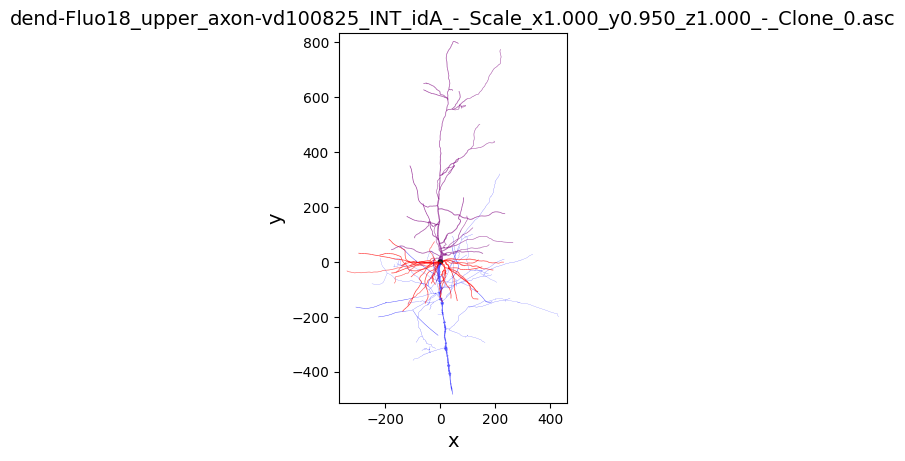

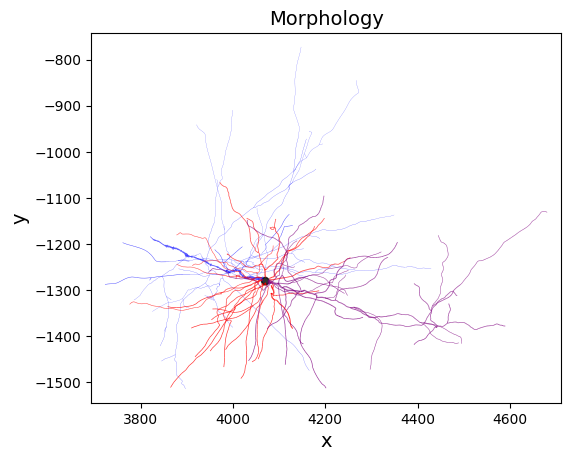

In [26]:
rot = scipy.spatial.transform.Rotation.from_quat(nodesinfo[["orientation_x", "orientation_y", "orientation_z", "orientation_w"]].values[gid])
rot = geom.transform.Rotation(rot.as_matrix())
tl = neurom.geom.transform.Translation(nodesinfo[["x", "y", "z"]].values[gid])

fn = MorphologyPath + nodesinfo['morphology'][gid] + '.asc'
nrn = neurom.load_morphology(fn)

viewer.draw(nrn, mode='2d')

nrn_morph = nrn.transform(rot).transform(tl)

viewer.draw(nrn_morph, mode='2d')


/tmp/ipykernel_229287/2578504979.py:13: NeuroMDeprecationWarning: `neurom.io.utils.load_neuron` is deprecated in favor of `neurom.io.utils.load_morphology`
  nrn = neurom.load_neuron(fn)


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'Morphology'}, xlabel='x', ylabel='y'>)

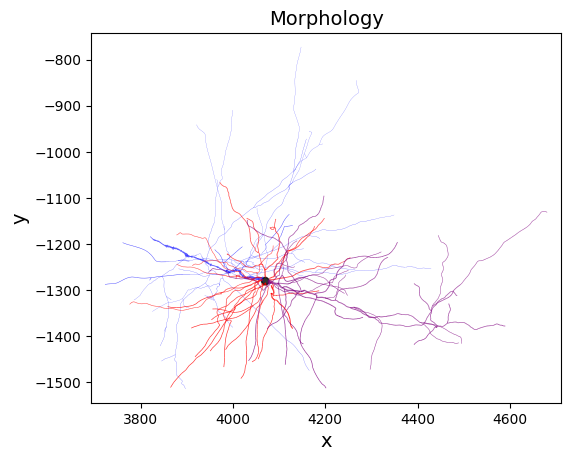

In [27]:
S1nonbarrel_cfg = cells.config
def transform_neuron(nrn_morph, neuron_row):
    rot = scipy.spatial.transform.Rotation.from_quat(neuron_row[["orientation_x", "orientation_y",
                                                                 "orientation_z", "orientation_w"]].values[gid])
    rot = neurom.geom.transform.Rotation(rot.as_matrix())
    tl = neurom.geom.transform.Translation(neuron_row[["x", "y", "z"]].values[gid])
    return nrn_morph.transform(rot).transform(tl)
    
def load_neuron(population_cfg, neuron_row, transform=True):
    
    fn = MorphologyPath + nodesinfo['morphology'][gid] + '.asc'
    
    nrn = neurom.load_neuron(fn)
    if transform:
        nrn = transform_neuron(nrn, neuron_row)
    return nrn

nrn_morph = load_neuron(S1nonbarrel_cfg, nodesinfo, transform=True)
viewer.draw(nrn_morph)

In [28]:
cells.size

211712

(array([30190., 29738., 31338., 29892., 30249., 29861., 30444.]),
 array([ 2695., 27864., 32971., 34263., 40858., 73061.]))

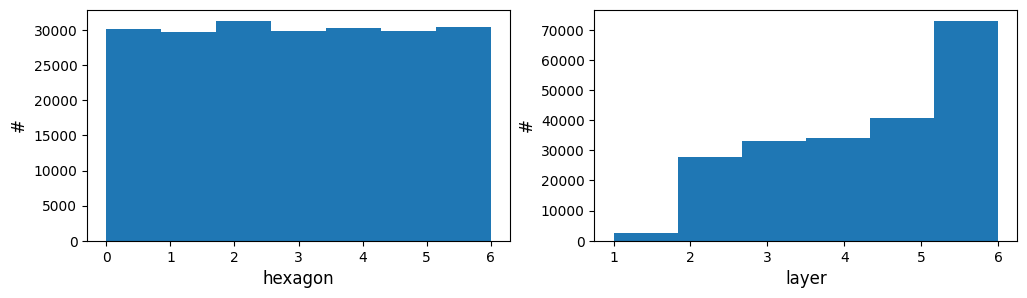

In [29]:
# plot the results
fig=plt.figure(figsize=(12,3))


plt.subplot(1,2,1)
mcName = []
for gid in range(cells.size):
    mcName.append(int(nodesinfo['hexagon'][gid]))  
Nhexagon = plt.hist(mcName, bins = 7)
plt.xlabel('hexagon', fontsize=12)
plt.ylabel('#', fontsize=12)

plt.subplot(1,2,2)
mcName2 = []
for gid in range(cells.size):
    mcName2.append(int(nodesinfo['layer'][gid]))  
Nlayer = plt.hist(mcName2, bins = 6)
plt.xlabel('layer', fontsize=12)
plt.ylabel('#', fontsize=12);

Nhexagon[0], Nlayer[0]

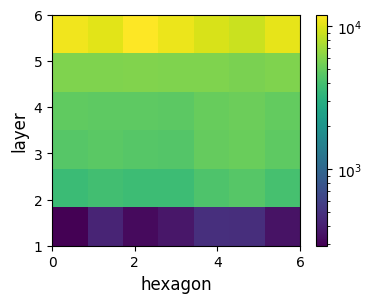

In [30]:
from matplotlib import colors
fig=plt.figure(figsize=(4,3))
plt.hist2d(mcName,mcName2, bins=(7,6), norm=colors.LogNorm());
plt.xlabel('hexagon', fontsize=12)
plt.ylabel('layer', fontsize=12)
plt.colorbar();

## Net info

In [31]:
print(list(circuit.nodes))
print(list(circuit.edges))

['POm', 'S1nonbarrel_neurons', 'VPM', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical']
['POm__S1nonbarrel_neurons__chemical', 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'VPM__S1nonbarrel_neurons__chemical', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical', 'midrange__S1nonbarrel_neurons__chemical']


In [32]:
cells = circuit.nodes["S1nonbarrel_neurons"]
conn = circuit.edges["S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"]

proj_cells = circuit.nodes["external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"]
proj_conn = circuit.edges["external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"]
print(cells.size)
print(conn.size)
print(proj_cells.size)
print(proj_conn.size)

211712
407127134
549126
104319446


In [33]:
pre_mtype = 'L6_NBC'
post_mtype = 'L6_NGC' 
print(pre_mtype, post_mtype)
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
nodepre = np.array([p[0] for p in itertools.islice(it, 10000000)])
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
nodepost = np.array([p[1] for p in itertools.islice(it, 10000000)])
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
synnumber = np.array([p[2] for p in itertools.islice(it, 10000000)])

print(np.size(synnumber),np.sum(synnumber),np.mean(synnumber),np.std(synnumber))
print(np.max(nodepre)-np.min(nodepre)+1,np.max(nodepost)-np.min(nodepost)+1)
print(np.min(nodepre),np.max(nodepre),np.min(nodepost),np.max(nodepost))

L6_NBC L6_NGC
168 1323 7.875 3.1361705113387055
1259 201
107439 108697 48691 48891


In [34]:
pre_mtype = 'L5_TPC:A'
post_mtype = 'L5_TPC:A' 
print(pre_mtype, post_mtype)
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
nodepre = np.array([p[0] for p in itertools.islice(it, 10000000)])
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
nodepost = np.array([p[1] for p in itertools.islice(it, 10000000)])
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
synnumber = np.array([p[2] for p in itertools.islice(it, 10000000)])

print(np.size(synnumber),np.sum(synnumber),np.mean(synnumber),np.std(synnumber))
print(np.max(nodepre)-np.min(nodepre)+1,np.max(nodepost)-np.min(nodepost)+1)
print(np.min(nodepre),np.max(nodepre),np.min(nodepost),np.max(nodepost))

L5_TPC:A L5_TPC:A
1213919 8047085 6.629013138438396 3.2264406526823572
16736 16736
193763 210498 193763 210498


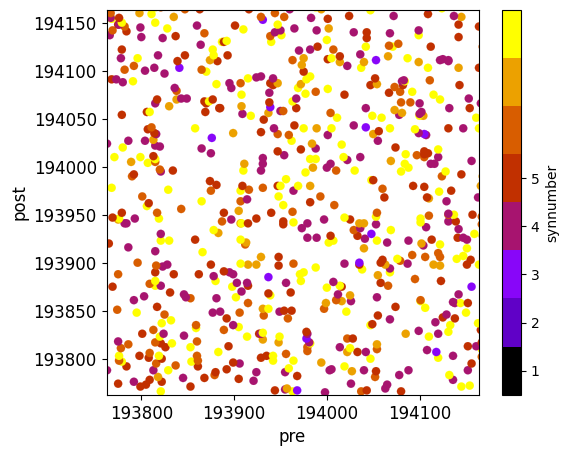

In [35]:
# plot the results
fig=plt.figure(figsize=(6, 5))
plt.scatter(nodepre,nodepost, lw=0.1,
            c=synnumber, cmap=plt.cm.get_cmap('gnuplot', 8))
plt.colorbar(ticks=range(6), label='synnumber')
plt.clim(0.5, 8.5)
plt.grid(False)
plt.xlabel('pre', fontsize=12)
plt.ylabel('post', fontsize=12)
plt.xlim(np.min(nodepre)-0.5,np.min(nodepre)+400.5)
plt.ylim(np.min(nodepre)-0.5,np.min(nodepre)+400.5)
#plt.xticks(fontsize=14, rotation=90)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

In [36]:
len(nodepost)

1213919

In [37]:
for gid in nodepre[:4]:
    print('%d %s %s %.2f %.2f %.2f' % (gid,nodesinfo['mtype'][gid],nodesinfo['region'][gid],nodesinfo['x'][gid],nodesinfo['y'][gid],nodesinfo['z'][gid]))
print('')
for gid in nodepost[:4]:
    print('%d %s %s %.2f %.2f %.2f' % (gid,nodesinfo['mtype'][gid],nodesinfo['region'][gid],nodesinfo['x'][gid],nodesinfo['y'][gid],nodesinfo['z'][gid]))
print('')
for gid in nodepre[-4:]:
    print('%d %s %s %.2f %.2f %.2f' % (gid,nodesinfo['mtype'][gid],nodesinfo['region'][gid],nodesinfo['x'][gid],nodesinfo['y'][gid],nodesinfo['z'][gid]))
print('')
for gid in nodepost[-4:]:
    print('%d %s %s %.2f %.2f %.2f' % (gid,nodesinfo['mtype'][gid],nodesinfo['region'][gid],nodesinfo['x'][gid],nodesinfo['y'][gid],nodesinfo['z'][gid]))
          

194634 L5_TPC:A S1FL 3710.64 -1153.69 -2161.84
194811 L5_TPC:A S1FL 3529.08 -1109.88 -2337.66
194908 L5_TPC:A S1FL 3727.60 -1297.94 -2167.71
195208 L5_TPC:A S1FL 3811.37 -1289.73 -2130.46

193763 L5_TPC:A S1FL 3723.90 -1192.69 -2142.30
193763 L5_TPC:A S1FL 3723.90 -1192.69 -2142.30
193763 L5_TPC:A S1FL 3723.90 -1192.69 -2142.30
193763 L5_TPC:A S1FL 3723.90 -1192.69 -2142.30

205349 L5_TPC:A S1FL 3972.85 -1922.41 -2276.38
206182 L5_TPC:A S1FL 3974.22 -1859.99 -2298.61
207943 L5_TPC:A S1FL 3999.98 -1866.74 -2390.46
208410 L5_TPC:A S1FL 3885.32 -1777.70 -2504.60

210498 L5_TPC:A S1FL 3868.98 -1883.81 -2406.79
210498 L5_TPC:A S1FL 3868.98 -1883.81 -2406.79
210498 L5_TPC:A S1FL 3868.98 -1883.81 -2406.79
210498 L5_TPC:A S1FL 3868.98 -1883.81 -2406.79


In [38]:
def distance3D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2)+np.power(nodesinfo['z'][gidpre]-nodesinfo['z'][gidpost],2))

In [39]:
i=0
mcout = {}
for gid in range(7):
    mcout[gid] = {}
    for gidpost in range(7):
        mcout[gid][gidpost] = 0

distance_3D = []           
nodeprex = []
nodepostx = []   
nodeprez = []
nodepostz = []         
nodeprey = []
nodeposty = []   
for numsyn in synnumber:
    gid = nodepre[i]
    gidpost = nodepost[i]
    mcout[int(nodesinfo['hexagon'][gid])][int(nodesinfo['hexagon'][gidpost])] += 1
    if nodesinfo['hexagon'][gid]==0:     
        nodeprex.append(nodesinfo['x_new'][gid])
        nodepostx.append(nodesinfo['x_new'][gidpost]) 
        nodeprey.append(nodesinfo['y_new'][gid])
        nodeposty.append(nodesinfo['y_new'][gidpost])
        nodeprez.append(nodesinfo['z_new'][gid])
        nodepostz.append(nodesinfo['z_new'][gidpost])
        distance_3D.append(distance3D(gid,gidpost))  
    
#     if nodesinfo['region'][gid][0:3] != nodesinfo['region'][gidpost][0:3]:
#     if distance3D(gid,gidpost)<50.0 and nodesinfo['region'][gid][0:3]=='mc2' and nodesinfo['region'][gidpost][0:3]=='mc1':
#         print('%d %s %s %.2f' % (numsyn,nodesinfo['region'][gid][0:3],nodesinfo['region'][gidpost][0:3],distance3D(gid,gidpost)))
#         distance_3D.append(distance3D(gid,gidpost))
        
    i+=1
# print(mc2in,mc2out)

In [40]:
print(np.size(nodepre),np.size(nodeprex),100*np.size(nodeprex)/np.size(nodepre))

1213919 212887 17.537166812612703


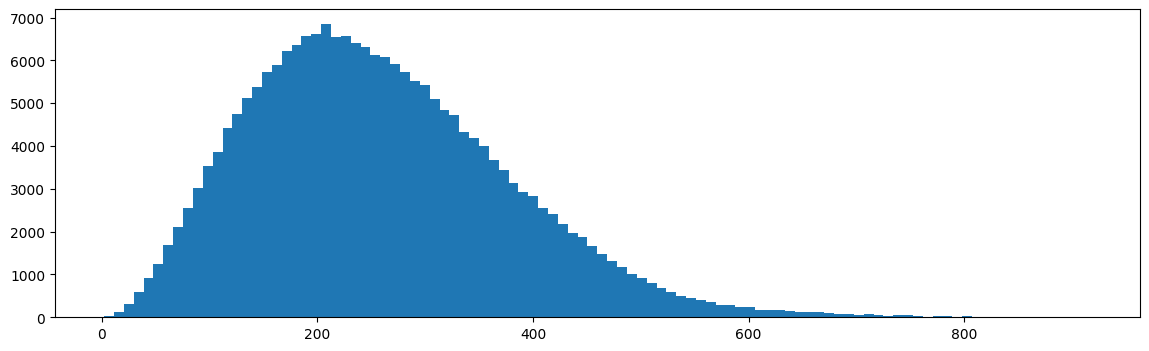

In [41]:
fig=plt.figure(figsize=(14,4))
plt.hist(distance_3D, bins=100);

In [42]:
print(np.max(nodepostz)-np.min(nodepostz),np.max(nodepostx)-np.min(nodepostx),np.max(nodeposty)-np.min(nodeposty))

632.4615503283176 1362.9575444490088 1313.2682769739824


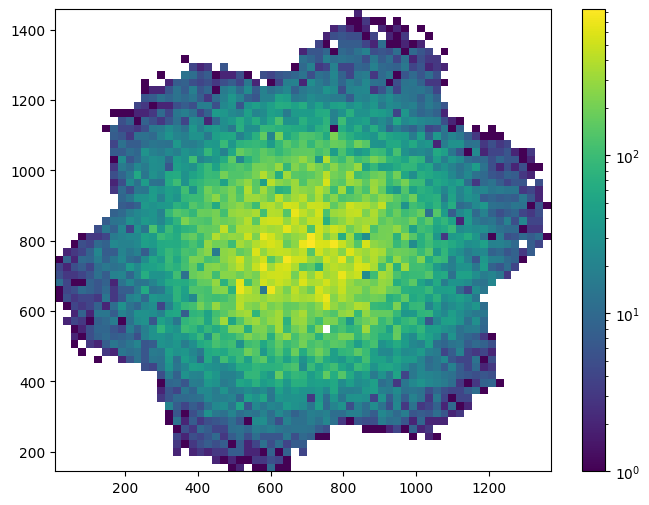

In [43]:
from matplotlib import colors
fig=plt.figure(figsize=(8,6))
plt.hist2d(nodepostx,nodeposty, bins=(63,60), norm=colors.LogNorm());
plt.colorbar();

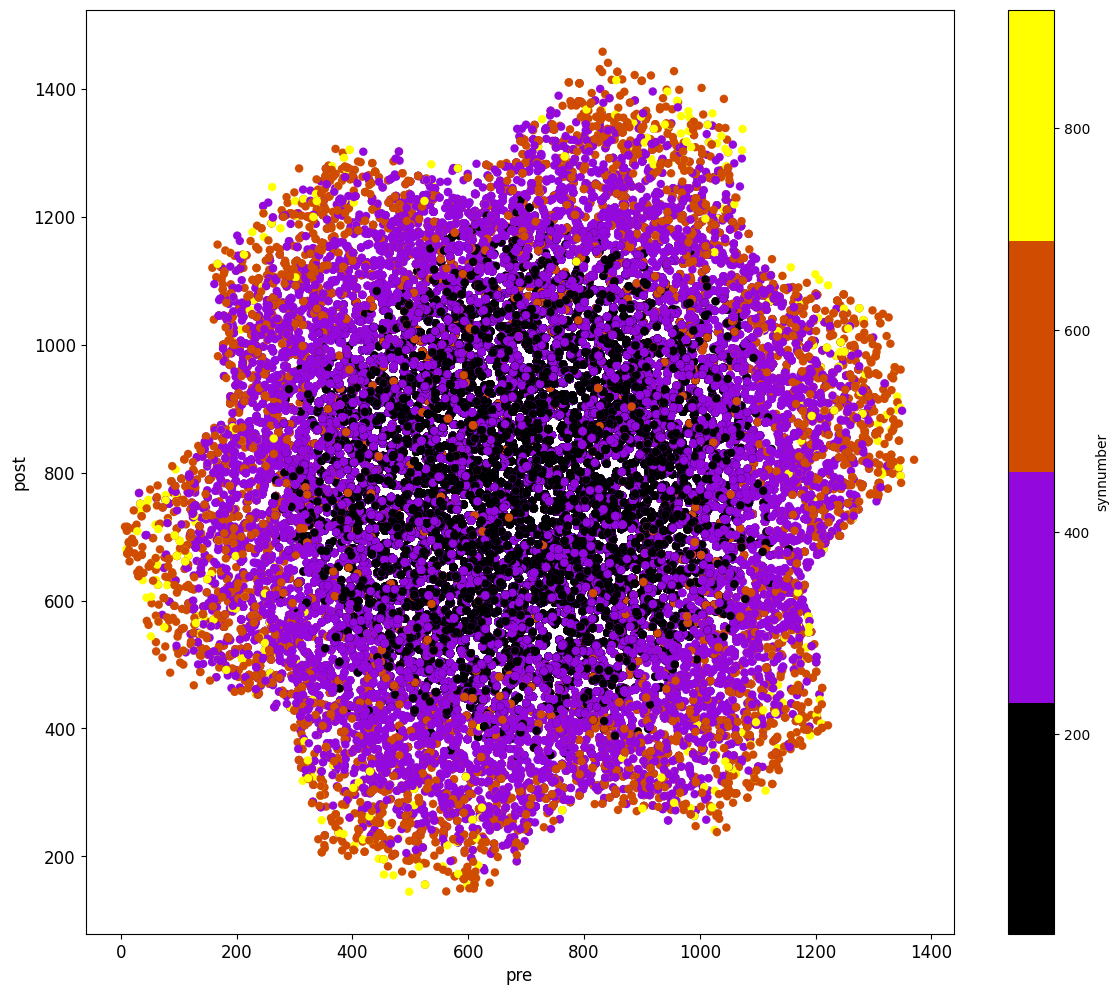

In [44]:
# plot the results
fig=plt.figure(figsize=(14,12))
# plt.scatter(nodeprez,nodeprex, lw=0.05,
#             c=distance_3D, cmap=plt.cm.get_cmap('gnuplot', 4))
plt.scatter(nodepostx,nodeposty, lw=0.05,
            c=distance_3D, cmap=plt.cm.get_cmap('gnuplot', 4))
# plt.colorbar(ticks=range(4), label='synnumber')
plt.colorbar(label='synnumber')
# plt.clim(0.5, 200.5)
plt.grid(False)
plt.xlabel('pre', fontsize=12)
plt.ylabel('post', fontsize=12)
# plt.xlim(np.min(nodepre2)-0.5,np.min(nodepre2)+400.5)
# plt.ylim(np.min(nodepre2)-0.5,np.min(nodepre2)+400.5)
#plt.xticks(fontsize=14, rotation=90)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

## Only hexagon0:hexagon0

In [45]:
i=0

distance_3D = []             
nodepre2 = []
nodepost2 = []           
nodeprex = []
nodepostx = []   
nodeprez = []
nodepostz = []         
nodeprey = []
nodeposty = []   
for numsyn in synnumber:
    gid = nodepre[i]
    gidpost = nodepost[i]
    if nodesinfo['hexagon'][gid]==0 and nodesinfo['hexagon'][gidpost]==0:   
        nodepre2.append(gid)
        nodepost2.append(gidpost)    
        nodeprex.append(nodesinfo['x_new'][gid])
        nodepostx.append(nodesinfo['x_new'][gidpost]) 
        nodeprey.append(nodesinfo['y_new'][gid])
        nodeposty.append(nodesinfo['y_new'][gidpost])
        nodeprez.append(nodesinfo['z_new'][gid])
        nodepostz.append(nodesinfo['z_new'][gidpost])
        distance_3D.append(distance3D(gid,gidpost))           
    i+=1

In [46]:
print(np.size(nodepre),np.size(nodeprex),100*np.size(nodeprex)/np.size(nodepre))

1213919 111538 9.188257206617575


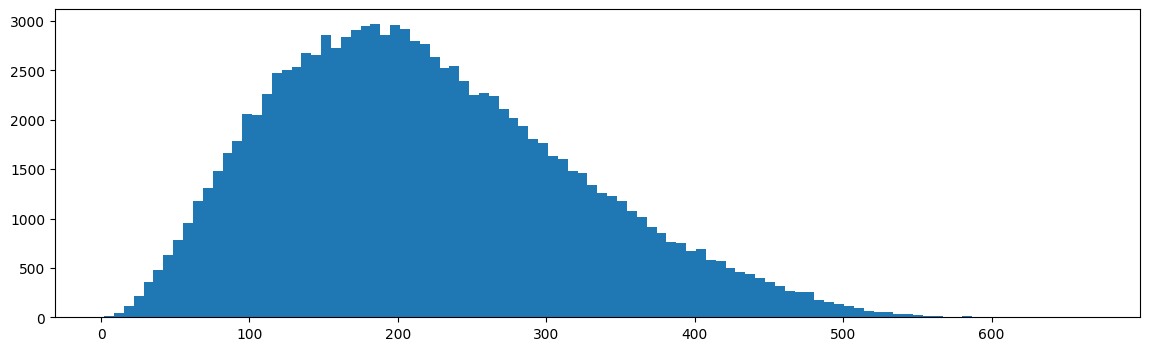

In [47]:
fig=plt.figure(figsize=(14,4))
plt.hist(distance_3D, bins=100);

In [48]:
print(np.max(nodeposty)-np.min(nodeposty),np.max(nodepostx)-np.min(nodepostx))

473.32607893989746 488.7038669892991


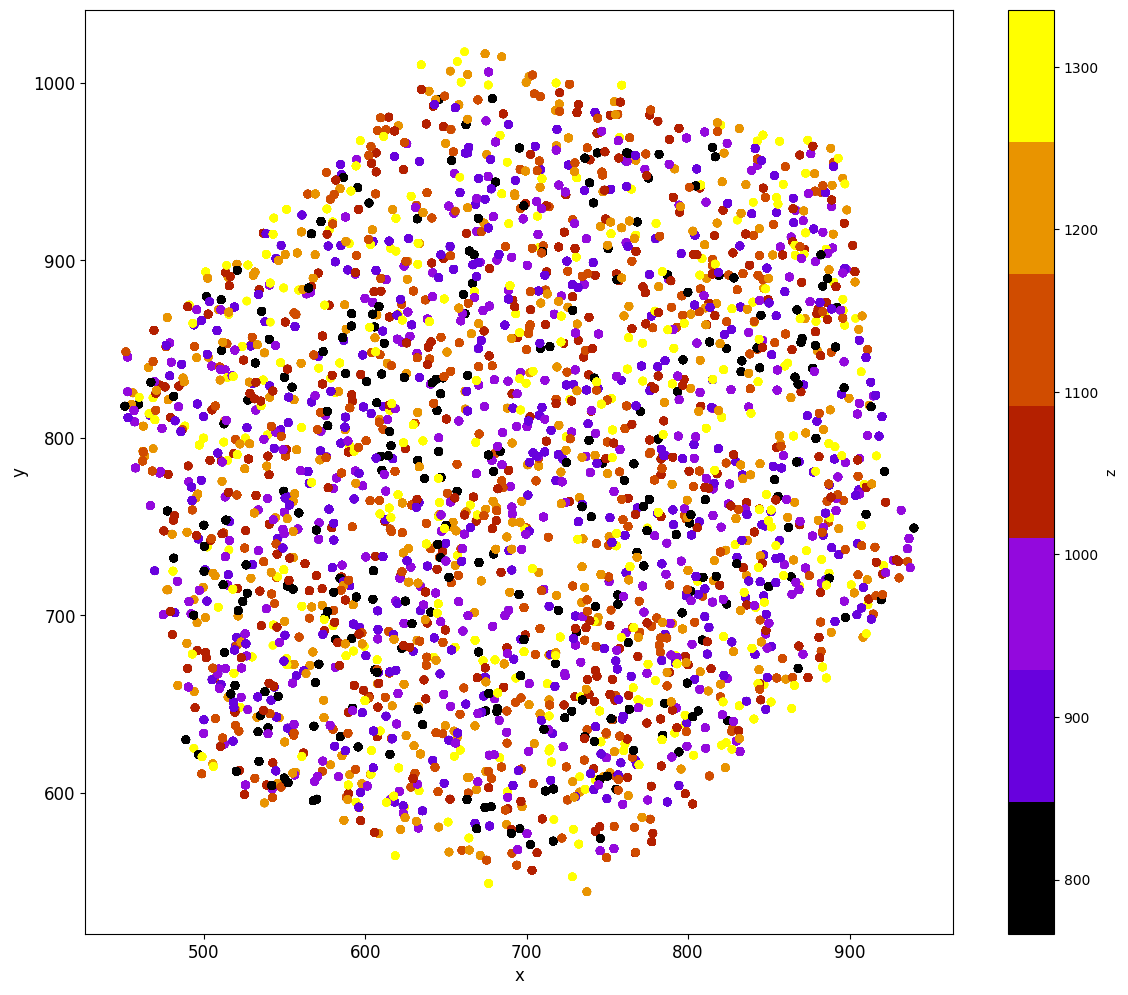

In [49]:
# plot the results
fig=plt.figure(figsize=(14,12))
# plt.scatter(nodeprez,nodeprex, lw=0.05,
#             c=distance_3D, cmap=plt.cm.get_cmap('gnuplot', 4))
plt.scatter(nodepostx,nodeposty, lw=0.05,
            c=nodepostz, cmap=plt.cm.get_cmap('gnuplot', 7))
# plt.colorbar(ticks=range(4), label='synnumber')
plt.colorbar(label='z')
# plt.clim(0.5, 200.5)
plt.grid(False)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
# plt.xlim(np.min(nodepre2)-0.5,np.min(nodepre2)+400.5)
# plt.ylim(np.min(nodepre2)-0.5,np.min(nodepre2)+400.5)
#plt.xticks(fontsize=14, rotation=90)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

In [50]:
np.size(distance_3D)

111538

In [62]:
# mtypes = cells.property_values(Cell.MTYPE)
model_mean = pd.DataFrame(index=list(mntypes.keys()), columns=list(mntypes.keys()), dtype=float)
model_std = pd.DataFrame(index=list(mntypes.keys()), columns=list(mntypes.keys()), dtype=float)

In [63]:
nsample = 1000
def sample_nsyn(pre, post):
    it = conn.iter_connections(pre, post, return_edge_count=True)
    return np.array([p[2] for p in itertools.islice(it, nsample)])

In [64]:
cells.property_values(Cell.REGION)

{'S1DZ', 'S1FL', 'S1J'}

In [72]:
mtypes_sub = sorted(mtypes)[0:20]

for pre_mtype in mtypes_sub:
    for post_mtype in mtypes_sub:
        data = sample_nsyn(
            pre={Cell.MTYPE: pre_mtype}, # , Cell.REGION: {'$regex': 'mc2.*'}
            post={Cell.MTYPE: post_mtype}
        )
        if len(data) != 0:
            model_mean[post_mtype][pre_mtype] = data.mean()
            model_std[post_mtype][pre_mtype] = data.std()

In [73]:
model_mean

,L1_DAC,L1_HAC,L1_LAC,L1_NGC-DA,L1_NGC-SA,L1_SAC,L23_BP,L23_BTC,L23_CHC,L23_DBC,...,L6_HPC,L6_IPC,L6_LBC,L6_MC,L6_NBC,L6_NGC,L6_SBC,L6_TPC:A,L6_TPC:C,L6_UPC
L1_DAC,14.016827,13.770526,14.878453,14.748705,14.291262,12.104072,1.085561,9.810811,12.070423,1.113677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L1_HAC,14.702381,14.257343,15.776371,14.948998,15.511166,13.614286,1.130045,10.177941,12.424051,1.127832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L1_LAC,15.785088,15.545113,17.384615,17.004878,16.666667,13.444444,1.134921,12.090301,14.371795,4.171875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L1_NGC-DA,19.146283,18.488550,20.198758,20.401028,19.424354,16.828704,3.675676,14.112205,16.702970,5.819820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L1_NGC-SA,14.182320,13.563319,15.350515,15.184971,14.859375,13.127451,1.055556,9.626415,13.219512,1.082126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L1_SAC,12.542857,12.565217,14.022727,13.370000,13.468750,12.222222,1.172414,9.440299,11.470588,1.184874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L23_BP,1.000000,NaN,1.000000,NaN,NaN,1.500000,2.666667,7.657143,NaN,1.050000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L23_BTC,9.227488,9.608889,9.876404,10.347059,9.790698,10.316239,2.787645,13.361996,14.487179,5.229102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L23_CHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L23_DBC,9.200000,7.325000,7.142857,9.645161,10.133333,9.739130,4.371429,13.251938,15.296296,5.764706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# for gidpre in range(0,7,2):
#     print(gidpre,nodesinfo['region'][gidpre][0:3],nodesinfo['mtype'][gidpre])
#     for gid in conn.afferent_nodes(gidpre):
#         print('  ',gid,nodesinfo['region'][gid][0:3],nodesinfo['mtype'][gid])

In [236]:
print(conn.size, cells.size)

407127134 211712


In [303]:
import nrrd

In [304]:
# atlas_directory = Atlas
# br_data, br_metadata = nrrd.read(atlas_directory + "flatmap.nrrd")

In [305]:
# sampled_edge_ids

In [306]:
hierarchy['children'][0]['children'][0]['children'][9]

{'acronym': 'S1;L1',
 'id': 1161,
 'name': 'primary somatosensory cortex, layer 1'}

In [307]:
atlas_directory = Atlas2
br_data, br_metadata = nrrd.read(atlas_directory + "brain_regions.nrrd")

# hierarchy contains the region hierarchy: 
hierarchy = json.load(open(atlas_directory + "hierarchy.json"))

id_layer_map = {}
for column in hierarchy["children"]:
    print(column["acronym"])
    id_ = column["id"]
    layer = column["acronym"] #.split(";")[-1]
    id_layer_map[id_] = layer
    for column2 in column["children"]:
        print(' ', column2["acronym"])
        id_ = column2["id"]
        layer = column2["acronym"] #.split(";")[-1]
        id_layer_map[id_] = layer
        try:
            for region in column2["children"]:
                print('  ', region["acronym"])
                id_ = region["id"]
                layer = region["acronym"] #.split(";")[-1]
                id_layer_map[id_] = layer
                
                try:
                    for region2 in region["children"]:                                  
                        print('\t\t ', region2)
                        id_ = region2["id"]
                        layer = region2["acronym"] #.split(";")[-1]
                        id_layer_map[id_] = layer
                except:                           
                    print('\t\t \t\t', region2)
                    
        except:
                print('\t\t ', column2)
            
id_layer_map[0] = 'out'

spacing = br_metadata["space directions"].diagonal()
offset = br_metadata["space origin"]

SSCtx
  S1
   S1BF
		  {'acronym': 'S1BF;L1', 'id': 1101, 'name': 'primary somatosensory cortex, barrel field, layer 1'}
		  {'acronym': 'S1BF;L2', 'id': 1102, 'name': 'primary somatosensory cortex, barrel field, layer 2'}
		  {'acronym': 'S1BF;L3', 'id': 1103, 'name': 'primary somatosensory cortex, barrel field, layer 3'}
		  {'acronym': 'S1BF;L4', 'id': 1104, 'name': 'primary somatosensory cortex, barrel field, layer 4'}
		  {'acronym': 'S1BF;L5', 'id': 1105, 'name': 'primary somatosensory cortex, barrel field, layer 5'}
		  {'acronym': 'S1BF;L6', 'id': 1106, 'name': 'primary somatosensory cortex, barrel field, layer 6'}
   S1DZ
		  {'acronym': 'S1DZ;L1', 'id': 1107, 'name': 'primary somatosensory cortex, dysgranular zone, layer 1'}
		  {'acronym': 'S1DZ;L2', 'id': 1108, 'name': 'primary somatosensory cortex, dysgranular zone, layer 2'}
		  {'acronym': 'S1DZ;L3', 'id': 1109, 'name': 'primary somatosensory cortex, dysgranular zone, layer 3'}
		  {'acronym': 'S1DZ;L4', 'id': 1110, 'nam

In [313]:
# we sample the edges to reduce the memory usage
N = 1000
# sampled_edge_ids = np.random.choice(conn.size, N, replace=False)
sampled_edge_ids = range(990,1000)

# we get the position of all the synapses from the projections and add it to a pandas dataframe
synapses = conn.positions(sampled_edge_ids, 'afferent', "center")

indices = np.array((synapses[["x", "y", "z"]].to_numpy() - offset) / spacing, dtype=int)

labels = br_data[tuple(indices.T)] 

def _apply_mapping(x):
    return id_layer_map[x]

apply_mapping = np.vectorize(_apply_mapping)
layers = apply_mapping(labels)
synapses['layer'] = layers

In [314]:
synapses

,x,y,z,layer
990,4184.125488,-1819.438843,-1539.994629,S1FL;L1
991,4244.251465,-1783.633423,-1538.327637,S1FL;L1
992,4294.855469,-1771.844360,-1541.290894,S1FL;L1
993,4163.025879,-1816.071777,-1704.425293,S1FL;L2
994,4250.604980,-1820.525391,-1555.182373,S1FL;L1
995,4266.789062,-1804.711792,-1531.716064,S1FL;L1
996,4260.025879,-1725.773682,-1576.265747,S1FL;L1
997,4168.793945,-1809.729004,-1698.798706,S1FL;L2
998,4237.578613,-1830.968140,-1582.814331,S1FL;L1
999,4248.315918,-1824.770264,-1560.539673,S1FL;L1


In [322]:
var_list_a = ['@target_node','@source_node','afferent_surface_x','afferent_surface_z','afferent_center_x','afferent_center_z','afferent_section_id',
              'afferent_surface_y','afferent_segment_offset','afferent_segment_id','afferent_section_type','afferent_section_pos']
connsinfo = conn.get(range(990,1000),var_list_a)
connsinfo

,@target_node,@source_node,afferent_surface_x,afferent_surface_z,afferent_center_x,afferent_center_z,afferent_section_id,afferent_surface_y,afferent_segment_offset,afferent_segment_id,afferent_section_type,afferent_section_pos
990,3,166642,4184.469238,-1539.666870,4184.125488,-1539.994629,992,-1819.370728,9.247905,5,3,0.422355
991,3,167115,4244.603027,-1538.002808,4244.251465,-1538.327637,1029,-1783.668457,0.475508,6,3,0.058571
992,3,167242,4294.853516,-1541.401733,4294.855469,-1541.290894,1056,-1771.692749,1.552043,20,3,0.264315
993,3,167309,4162.857910,-1704.348145,4163.025879,-1704.425293,1008,-1816.073120,0.078999,203,3,0.966366
994,3,168088,4250.420410,-1555.071411,4250.604980,-1555.182373,984,-1820.570068,3.661842,4,3,0.113482
995,3,170414,4259.015625,-1528.419312,4266.789062,-1531.716064,0,-1811.808960,0.000000,0,1,0.000000
996,3,186103,4260.066406,-1576.607910,4260.025879,-1576.265747,1029,-1725.751343,0.109451,69,3,0.885025
997,3,190111,4168.441895,-1698.616699,4168.793945,-1698.798706,1008,-1809.457886,0.591282,188,3,0.904846
998,3,192466,4237.376465,-1582.691895,4237.578613,-1582.814331,1008,-1831.426636,0.974806,12,3,0.069056
999,3,201513,4248.255859,-1560.664307,4248.315918,-1560.539673,984,-1824.599121,1.146754,5,3,0.212501


In [269]:
list(conn.property_names)

['afferent_surface_x',
 'u_syn',
 'afferent_surface_z',
 'efferent_segment_offset',
 'afferent_center_y',
 'delay',
 'spine_length',
 'conductance',
 'syn_type_id',
 'efferent_surface_x',
 'afferent_center_x',
 'depression_time',
 'efferent_surface_z',
 'afferent_center_z',
 'afferent_section_id',
 'afferent_surface_y',
 'n_rrp_vesicles',
 'u_hill_coefficient',
 'afferent_segment_offset',
 'afferent_segment_id',
 'efferent_surface_y',
 'efferent_section_id',
 'efferent_segment_id',
 'efferent_center_x',
 'efferent_center_z',
 'conductance_scale_factor',
 '@target_node',
 'facilitation_time',
 'efferent_center_y',
 'efferent_section_type',
 'efferent_section_pos',
 '@source_node',
 'decay_time',
 'afferent_section_type',
 'afferent_section_pos']

In [315]:
connsinfo = conn.get(range(900,1000), list(conn.property_names))

In [316]:
connsinfo

,afferent_surface_x,u_syn,afferent_surface_z,efferent_segment_offset,afferent_center_y,delay,spine_length,conductance,syn_type_id,efferent_surface_x,...,conductance_scale_factor,@target_node,facilitation_time,efferent_center_y,efferent_section_type,efferent_section_pos,@source_node,decay_time,afferent_section_type,afferent_section_pos
900,4316.729980,0.217713,-1511.875488,1.555289,-1763.385254,0.989327,0.320211,1.433583,1,4316.713379,...,0.0,3,11.852793,-1763.216919,2,0.444756,34945,9.472147,3,0.506380
901,4286.483398,0.217713,-1590.088257,1.503727,-1815.310303,1.695170,0.423272,1.433583,1,4286.140625,...,0.0,3,11.852793,-1815.918091,2,0.135172,34945,9.472147,3,0.599361
902,4258.050293,0.217713,-1542.955200,1.171310,-1804.618408,0.978782,0.000000,1.433583,1,4257.991211,...,0.0,3,11.852793,-1804.957520,2,0.408461,34945,9.472147,3,0.511386
903,4269.923340,0.191227,-1500.469971,0.074066,-1720.141113,1.365210,1.144051,2.218155,1,4268.958984,...,0.0,3,14.448600,-1720.352905,2,0.511744,35022,8.529756,3,0.308923
904,4246.836426,0.191227,-1554.437988,1.266290,-1759.162354,1.234468,1.577339,2.218155,1,4245.561035,...,0.0,3,14.448600,-1759.193848,2,0.424325,35022,8.529756,3,0.402950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4259.015625,0.496048,-1528.419312,4.233896,-1804.711792,1.544543,0.000000,0.196762,136,4259.934570,...,0.8,3,16.532793,-1811.211914,2,0.712265,170414,1.774157,1,0.000000
996,4260.066406,0.519456,-1576.607910,1.367321,-1725.773682,4.506541,0.000000,0.295553,136,4260.023926,...,0.8,3,11.025530,-1725.790649,2,0.789122,186103,1.859456,3,0.885025
997,4168.441895,0.499232,-1698.616699,0.317632,-1809.729004,3.938326,1.540561,0.223484,136,4167.183594,...,0.8,3,11.966792,-1808.370117,2,0.588630,190111,1.716869,3,0.904846
998,4237.376465,0.497905,-1582.691895,0.811190,-1830.968140,6.158167,0.000000,0.304074,136,4237.386230,...,0.8,3,14.209718,-1831.487305,2,0.311230,192466,1.571472,3,0.069056


### Synaptic connectivity

The synaptic connectivity of the model is accessed using circ_extr.edges.
As an example, let's find out which neurons innervate an exemplary neuron

In [325]:
ls

'Analyze connectivity reach.ipynb'       node_sets.json
'Analyze connectivity strengths.ipynb'   O1_data_physiology/
 Circuitexamples.ipynb                   save_new_positions_3Dplots.ipynb
'Circuit exploration examples.ipynb'    'Synaptic innervation patterns.ipynb'
 import_3Dplots_rearange.ipynb           topology_analysis.log
 import_h5infos.ipynb*


In [331]:
import os
import bluepysnap  # https://bluebrainsnap.readthedocs.io/en/stable/
import neurom  # https://neurom.readthedocs.io/en/stable/
import pandas
import numpy
import scipy

from neurom import viewer

fn_extr = CircuitPath + "circuit_config.json"
circ_extr = bluepysnap.Circuit(fn_extr)


In [333]:
print(circ_extr.nodes.population_names)

['POm', 'S1nonbarrel_neurons', 'VPM', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical']


In [334]:
lst_properties = ['layer', 'region', 'synapse_class', 'population',
                  'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w',
                  'morph_class', 'model_type', 'mtype', 'morphology',
                  'x', 'y', 'z']

lst_properties = [ 'etype', 'exc_mini_frequency', 'inh_mini_frequency', 'layer', 'me_combo', 'model_template', 'model_type', 'morph_class', 'morphology', 'mtype', 
                  'orientation_w', 'orientation_x', 'orientation_y', 'orientation_z', 'population', 'region', 'synapse_class', '@dynamics:holding_current', 
                  '@dynamics:input_resistance', '@dynamics:resting_potential', '@dynamics:threshold_current', 'x', 'y', 'z']
n_props = circ_extr.nodes['S1nonbarrel_neurons'].get(properties=lst_properties)
display(n_props)

,etype,exc_mini_frequency,inh_mini_frequency,layer,me_combo,model_template,model_type,morph_class,morphology,mtype,...,population,region,synapse_class,@dynamics:holding_current,@dynamics:input_resistance,@dynamics:resting_potential,@dynamics:threshold_current,x,y,z
node_ids,,,,,,,,,,,,,,,,,,,,,
0,bNAC,0.010108,0.233243,1,bNAC_L23SBC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23SBC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,-0.063857,163.571762,-74.320229,0.114051,4652.171846,-1930.525524,-1836.395782
1,cNAC,0.010108,0.233243,1,cNAC_L23NGC_L1_DAC_1_C270106A_-_Scale_x1.000_y...,hoc:cNAC_L23NGC,biophysical,INT,C270106A_-_Scale_x1.000_y1.025_z1.000,L1_DAC,...,S1nonbarrel_neurons,S1J,INH,-0.056414,192.304916,-73.626152,0.083738,4977.735899,-1641.041348,-2140.579908
2,bNAC,0.010108,0.233243,1,bNAC_L23NGC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23NGC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...,L1_DAC,...,S1nonbarrel_neurons,S1J,INH,-0.059054,169.438538,-72.886154,0.084117,5011.718764,-1565.779688,-2212.599874
3,cNAC,0.010108,0.233243,1,cNAC_L6NGC_L1_DAC_1_sm090918b1-3_idB_-_Scale_x...,hoc:cNAC_L6NGC,biophysical,INT,sm090918b1-3_idB_-_Scale_x1.000_y0.950_z1.000,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,-0.100206,100.864609,-74.003380,0.157909,4266.789018,-1804.711830,-1531.716011
4,bNAC,0.010108,0.233243,1,bNAC_L23NGC_L1_DAC_1_C270106C_-_Scale_x1.000_y...,hoc:bNAC_L23NGC,biophysical,INT,C270106C_-_Scale_x1.000_y0.975_z1.000,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,-0.040889,247.846909,-72.796501,0.052005,4779.539653,-1259.558916,-1996.720501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211707,bNAC,0.010108,0.233243,5,bNAC_L23NGC_L5_BP_5_C240300C1_-_Scale_x1.000_y...,hoc:bNAC_L23NGC,biophysical,INT,C240300C1_-_Scale_x1.000_y0.975_z1.000_-_Clone_1,L5_BP,...,S1nonbarrel_neurons,S1FL,INH,-0.043246,259.866028,-71.974144,0.048974,4053.191307,-663.722760,-2140.027223
211708,dSTUT,0.010108,0.233243,5,dSTUT_L5BP_L5_BP_5_C240300C1_-_Clone_0,hoc:dSTUT_L5BP,biophysical,INT,C240300C1_-_Clone_0,L5_BP,...,S1nonbarrel_neurons,S1FL,INH,-0.072633,66.215591,-76.741768,0.182784,4002.636889,-1382.419711,-2641.743271
211709,bNAC,0.010108,0.233243,5,bNAC_L23NGC_L5_BP_5_rp110127_L5-2_idC_-_Scale_...,hoc:bNAC_L23NGC,biophysical,INT,rp110127_L5-2_idC_-_Scale_x1.000_y1.025_z1.000,L5_BP,...,S1nonbarrel_neurons,S1FL,INH,-0.023842,405.003632,-73.244141,0.032160,4228.866737,-909.053724,-2608.261691


In [335]:
# The method we use below requires node ids as input. So we load the ids of the "S1nonbarrel_neurons"
# node_ids = circ_extr.nodes.ids().filter_population("S1nonbarrel_neurons")
node_ids = circ_extr.nodes['S1nonbarrel_neurons'].ids()

# This will be our examplary neuron. Let's look at its properties
display(n_props.loc[node_ids[0]])

# Which neurons are afferent to the first one?
aff = circ_extr.edges.afferent_nodes(node_ids[0])

aff_ids = []
for population,id1 in list(aff):
    aff_ids.append(id1)
#     print(population,id1)
    

# What's returned can be used as index into the neuron properties data frame
aff_props = n_props.loc[aff_ids]

display(aff_props.head())

# Look at the regions of neurons innervating the exemplary one from within the model population
display(aff_props["region"].value_counts())

# Look at the regions of neurons innervating the exemplary one from within the model population
display(aff_props["population"].value_counts())

etype                                                                       bNAC
exc_mini_frequency                                                      0.010108
inh_mini_frequency                                                      0.233243
layer                                                                          1
me_combo                       bNAC_L23SBC_L1_DAC_1_sm120429_2photon_a1-3_idA...
model_template                                                   hoc:bNAC_L23SBC
model_type                                                           biophysical
morph_class                                                                  INT
morphology                     sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...
mtype                                                                     L1_DAC
orientation_w                                                           0.633052
orientation_x                                                           0.517516
orientation_y               

,etype,exc_mini_frequency,inh_mini_frequency,layer,me_combo,model_template,model_type,morph_class,morphology,mtype,...,population,region,synapse_class,@dynamics:holding_current,@dynamics:input_resistance,@dynamics:resting_potential,@dynamics:threshold_current,x,y,z
node_ids,,,,,,,,,,,,,,,,,,,,,
45,cNAC,0.010108,0.233243,1,cNAC_L4CHC_L1_DAC_1_C270106C_-_Scale_x1.000_y0...,hoc:cNAC_L4CHC,biophysical,INT,C270106C_-_Scale_x1.000_y0.950_z1.000,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,-0.029316,362.091797,-73.136925,0.031828,4422.032614,-1674.944966,-1569.280034
61,bNAC,0.010108,0.233243,1,bNAC_L23NGC_L1_DAC_1_sm080723a1-4_idC_-_Scale_...,hoc:bNAC_L23NGC,biophysical,INT,sm080723a1-4_idC_-_Scale_x1.000_y1.025_z1.000_...,L1_DAC,...,S1nonbarrel_neurons,S1DZ,INH,-0.029929,310.378510,-73.547577,0.043574,4774.155656,-1956.202466,-1865.513919
125,cNAC,0.010108,0.233243,1,cNAC_L4CHC_L1_DAC_1_sm090918b1-3_idB_-_Scale_x...,hoc:cNAC_L4CHC,biophysical,INT,sm090918b1-3_idB_-_Scale_x1.000_y0.950_z1.000,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,-0.038962,254.700348,-73.845642,0.053426,4151.477289,-990.187279,-1389.324354
242,cNAC,0.010108,0.233243,1,cNAC_L6NGC_L1_DAC_1_C270106C,hoc:cNAC_L6NGC,biophysical,INT,C270106C,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,-0.072402,143.599945,-73.828171,0.102210,4385.413769,-1112.414046,-1608.166235
260,cNAC,0.010108,0.233243,1,cNAC_L4CHC_L1_DAC_1_sm080930a1-5_idC_-_Scale_x...,hoc:cNAC_L4CHC,biophysical,INT,sm080930a1-5_idC_-_Scale_x1.000_y1.050_z1.000_...,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,-0.025802,409.334656,-73.153366,0.026902,4839.511129,-1418.033459,-2010.704828


region
S1FL    478
S1DZ     99
S1J      27
Name: count, dtype: int64

population
S1nonbarrel_neurons    604
Name: count, dtype: int64

In [336]:
len(aff_ids)

604

In [ ]:
len(node_ids_id)

In [339]:
n_props = circ_extr.nodes['S1nonbarrel_neurons'].get(properties=lst_properties)
display(n_props)

,etype,exc_mini_frequency,inh_mini_frequency,layer,me_combo,model_template,model_type,morph_class,morphology,mtype,...,population,region,synapse_class,@dynamics:holding_current,@dynamics:input_resistance,@dynamics:resting_potential,@dynamics:threshold_current,x,y,z
node_ids,,,,,,,,,,,,,,,,,,,,,
0,bNAC,0.010108,0.233243,1,bNAC_L23SBC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23SBC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,-0.063857,163.571762,-74.320229,0.114051,4652.171846,-1930.525524,-1836.395782
1,cNAC,0.010108,0.233243,1,cNAC_L23NGC_L1_DAC_1_C270106A_-_Scale_x1.000_y...,hoc:cNAC_L23NGC,biophysical,INT,C270106A_-_Scale_x1.000_y1.025_z1.000,L1_DAC,...,S1nonbarrel_neurons,S1J,INH,-0.056414,192.304916,-73.626152,0.083738,4977.735899,-1641.041348,-2140.579908
2,bNAC,0.010108,0.233243,1,bNAC_L23NGC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23NGC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...,L1_DAC,...,S1nonbarrel_neurons,S1J,INH,-0.059054,169.438538,-72.886154,0.084117,5011.718764,-1565.779688,-2212.599874
3,cNAC,0.010108,0.233243,1,cNAC_L6NGC_L1_DAC_1_sm090918b1-3_idB_-_Scale_x...,hoc:cNAC_L6NGC,biophysical,INT,sm090918b1-3_idB_-_Scale_x1.000_y0.950_z1.000,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,-0.100206,100.864609,-74.003380,0.157909,4266.789018,-1804.711830,-1531.716011
4,bNAC,0.010108,0.233243,1,bNAC_L23NGC_L1_DAC_1_C270106C_-_Scale_x1.000_y...,hoc:bNAC_L23NGC,biophysical,INT,C270106C_-_Scale_x1.000_y0.975_z1.000,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,-0.040889,247.846909,-72.796501,0.052005,4779.539653,-1259.558916,-1996.720501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211707,bNAC,0.010108,0.233243,5,bNAC_L23NGC_L5_BP_5_C240300C1_-_Scale_x1.000_y...,hoc:bNAC_L23NGC,biophysical,INT,C240300C1_-_Scale_x1.000_y0.975_z1.000_-_Clone_1,L5_BP,...,S1nonbarrel_neurons,S1FL,INH,-0.043246,259.866028,-71.974144,0.048974,4053.191307,-663.722760,-2140.027223
211708,dSTUT,0.010108,0.233243,5,dSTUT_L5BP_L5_BP_5_C240300C1_-_Clone_0,hoc:dSTUT_L5BP,biophysical,INT,C240300C1_-_Clone_0,L5_BP,...,S1nonbarrel_neurons,S1FL,INH,-0.072633,66.215591,-76.741768,0.182784,4002.636889,-1382.419711,-2641.743271
211709,bNAC,0.010108,0.233243,5,bNAC_L23NGC_L5_BP_5_rp110127_L5-2_idC_-_Scale_...,hoc:bNAC_L23NGC,biophysical,INT,rp110127_L5-2_idC_-_Scale_x1.000_y1.025_z1.000,L5_BP,...,S1nonbarrel_neurons,S1FL,INH,-0.023842,405.003632,-73.244141,0.032160,4228.866737,-909.053724,-2608.261691


In [340]:
# The method we use below requires node ids as input. So we load the ids of the "S1nonbarrel_neurons"
node_ids = circ_extr.nodes.ids()
node_ids_id = []
for population,id1 in list(aff):
    node_ids_id.append(id1)
    
    
# This will be our examplary neuron. Let's look at its properties
display(n_props.loc[node_ids_id[0]])

# Which neurons are afferent to the first one?
aff = circ_extr.edges.afferent_nodes(node_ids[0])

aff_ids = []
for population,id1 in list(aff):
    aff_ids.append(id1)
#     print(population,id1)
    

# What's returned can be used as index into the neuron properties data frame
aff_props = n_props.loc[aff_ids]

display(aff_props.head())

# Look at the regions of neurons innervating the exemplary one from within the model population
display(aff_props["region"].value_counts())

# Look at the regions of neurons innervating the exemplary one from within the model population
display(aff_props["population"].value_counts())

etype                                                                       cNAC
exc_mini_frequency                                                      0.010108
inh_mini_frequency                                                      0.233243
layer                                                                          1
me_combo                       cNAC_L4CHC_L1_DAC_1_C270106C_-_Scale_x1.000_y0...
model_template                                                    hoc:cNAC_L4CHC
model_type                                                           biophysical
morph_class                                                                  INT
morphology                                 C270106C_-_Scale_x1.000_y0.950_z1.000
mtype                                                                     L1_DAC
orientation_w                                                           0.622498
orientation_x                                                           0.449814
orientation_y               

,etype,exc_mini_frequency,inh_mini_frequency,layer,me_combo,model_template,model_type,morph_class,morphology,mtype,...,population,region,synapse_class,@dynamics:holding_current,@dynamics:input_resistance,@dynamics:resting_potential,@dynamics:threshold_current,x,y,z
node_ids,,,,,,,,,,,,,,,,,,,,,


region
S1DZ    0
S1FL    0
S1J     0
Name: count, dtype: int64

population
S1nonbarrel_neurons    0
Name: count, dtype: int64

We see that the exemplary neuron is a L1_DAC neuron in the S1FL (front limb) area. From within the modeled population, it is mostly innervated by other S1FL neurons.

Let's see what external neurons innervate it.

In [343]:
print(circ_extr.edges.population_names)

['POm__S1nonbarrel_neurons__chemical', 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'VPM__S1nonbarrel_neurons__chemical', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical', 'midrange__S1nonbarrel_neurons__chemical']


In [341]:
# External innervation via local connections
display(aff_props["region"]["external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"].value_counts())

# External innervation via long-range connections
display(aff_props["region"]["external_midrange__S1nonbarrel_neurons__chemical"].value_counts())


KeyError: 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical'

Unsurprisingly, we see that external innervation via local connection comes also mostly from S1FL. For long-range connections though, S1ULp is dominating.

Properties of the synapses (such as their dendritic and axon locations) can be accessed as follows:

In [ ]:
circ_extr.edges.afferent_edges(node_ids[0], properties=['afferent_section_id',
                                                        'afferent_segment_id', 
                                                        'afferent_segment_offset'])

These were just simple examples. For more analyses on the connectivity, see the SONATA documentation, and the bluepysnap documentation linked in the first cell.